In [1]:
# %% [markdown]
# # Prediksi Penyakit Jantung (Heart Disease Prediction)
# **Dataset**: Heart Failure Prediction (918 sampel)  
# **Jenis**: Klasifikasi biner  
# **Target**: HeartDisease (0 = sehat, 1 = sakit)


In [2]:
# ======================
# 1. IMPORT LIBRARY
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import os


In [3]:

# ======================
# 2. LOAD DATA
# ======================
df = pd.read_csv('../data/heart.csv')
print(f"Shape dataset: {df.shape}")
print("\n5 data pertama:")
display(df.head())


Shape dataset: (918, 12)

5 data pertama:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:

# ======================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ======================
print("\n=== EKSPLORASI DATA ===")



=== EKSPLORASI DATA ===


In [5]:

# 3.1. Info Dasar
print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
df.describe()

#copy describe




Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Statistik deskriptif:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:

# 3.2. Cek Missing Values
print("\nMissing values per kolom:")
print(df.isnull().sum())




Missing values per kolom:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


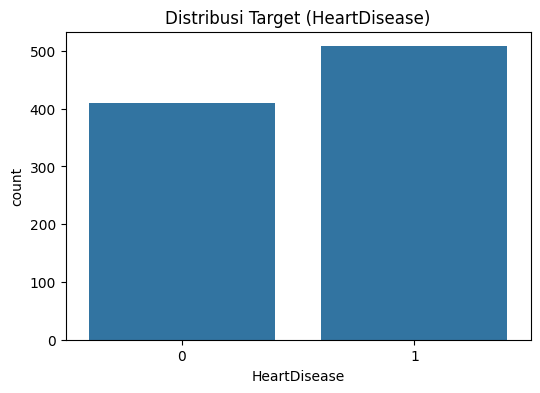

In [7]:

# 3.3. Analisis Target
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Target (HeartDisease)')
plt.show()



Analisis fitur numerik:


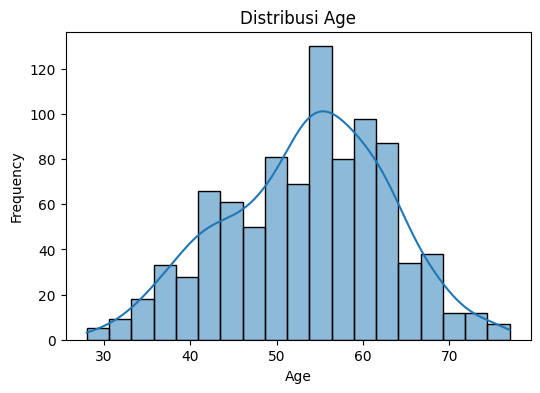

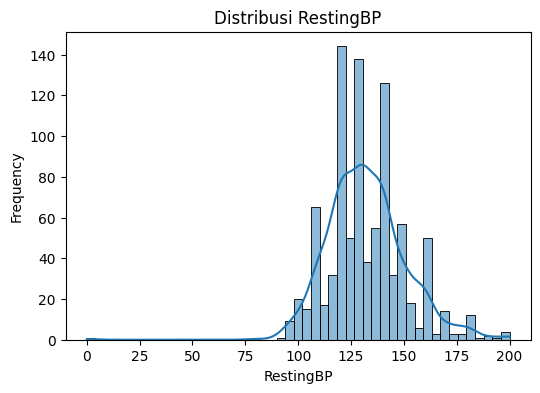

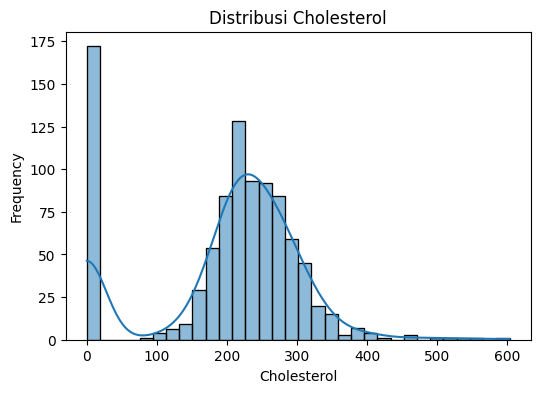

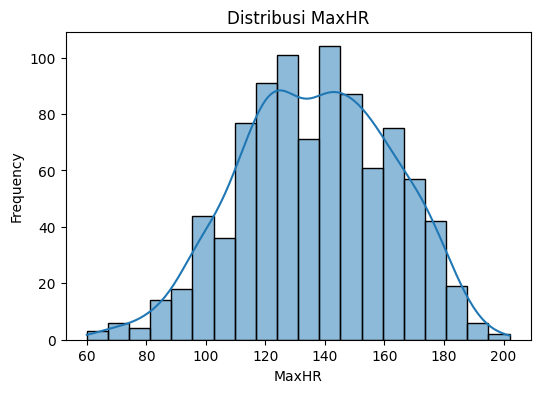

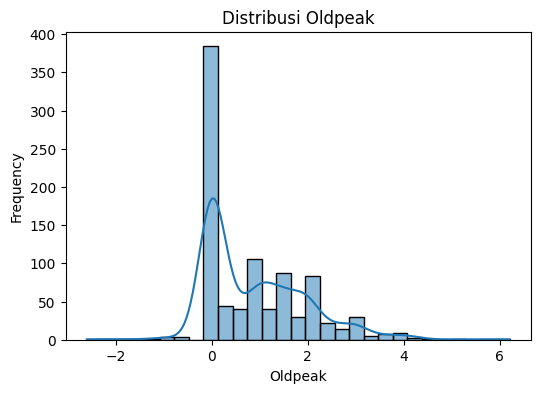

In [8]:
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
print("\nAnalisis fitur numerik:")

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

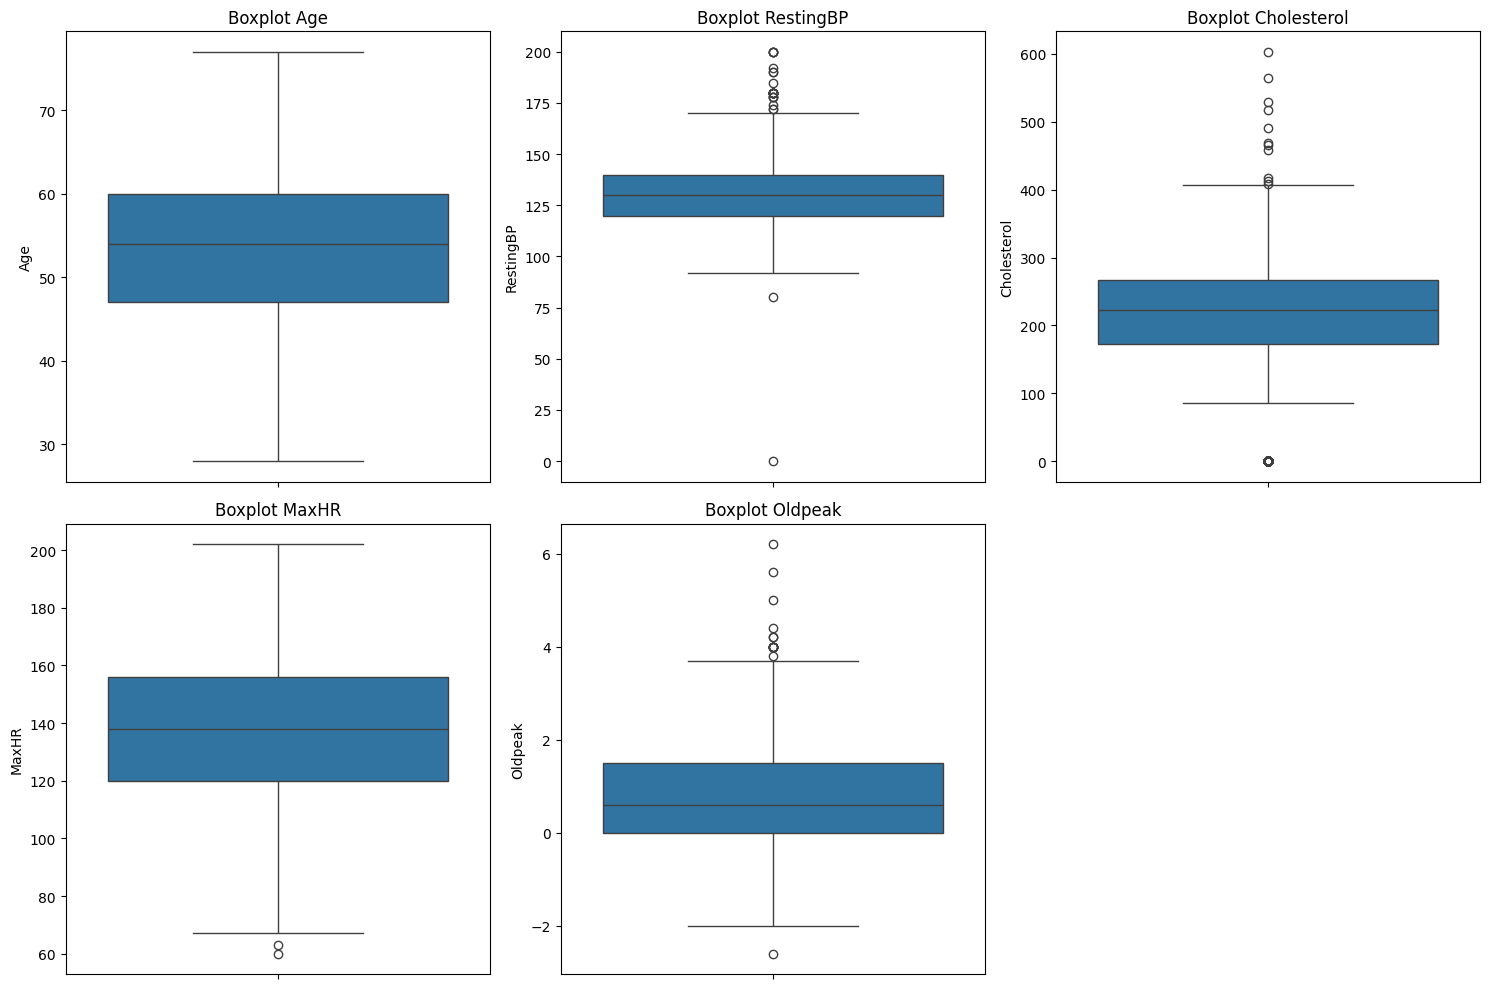

In [9]:

# Boxplot untuk outlier
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()



Analisis fitur kategorik:


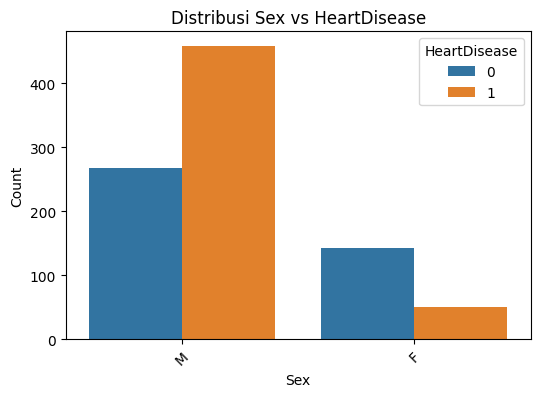

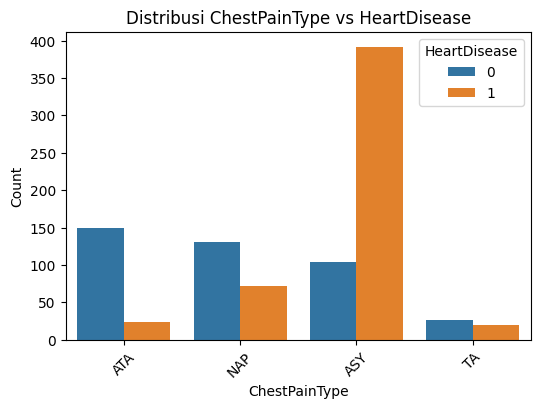

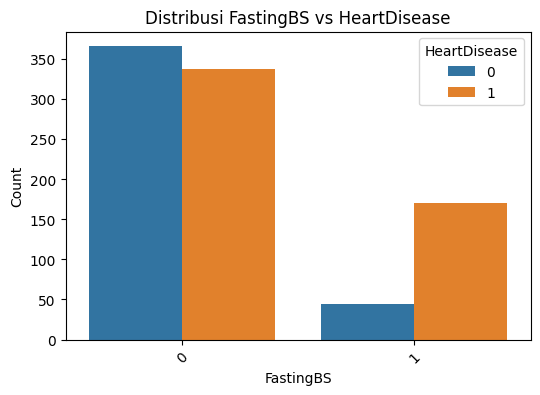

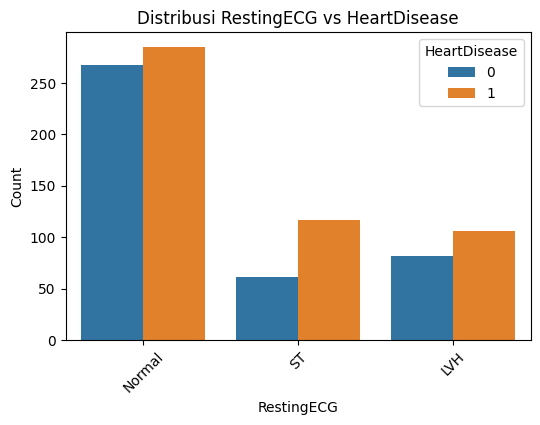

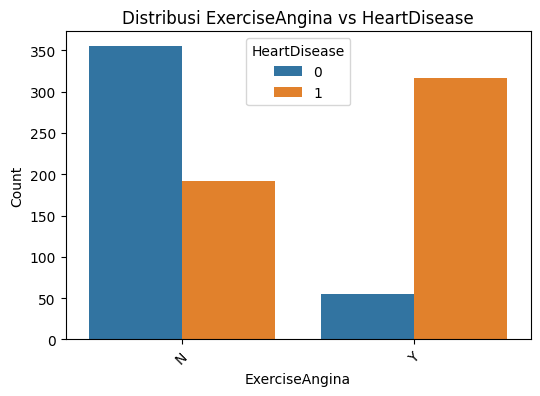

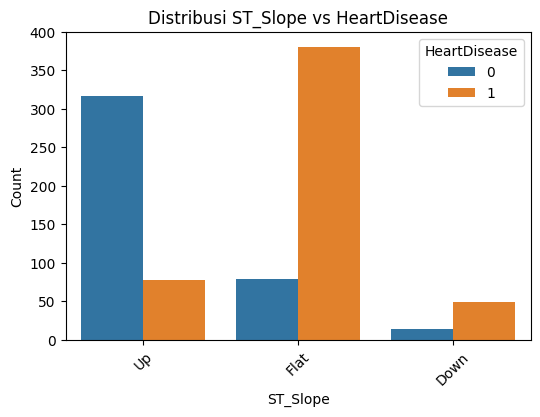

In [10]:

cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("\nAnalisis fitur kategorik:")

for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Distribusi {col} vs HeartDisease')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease')
    plt.show()

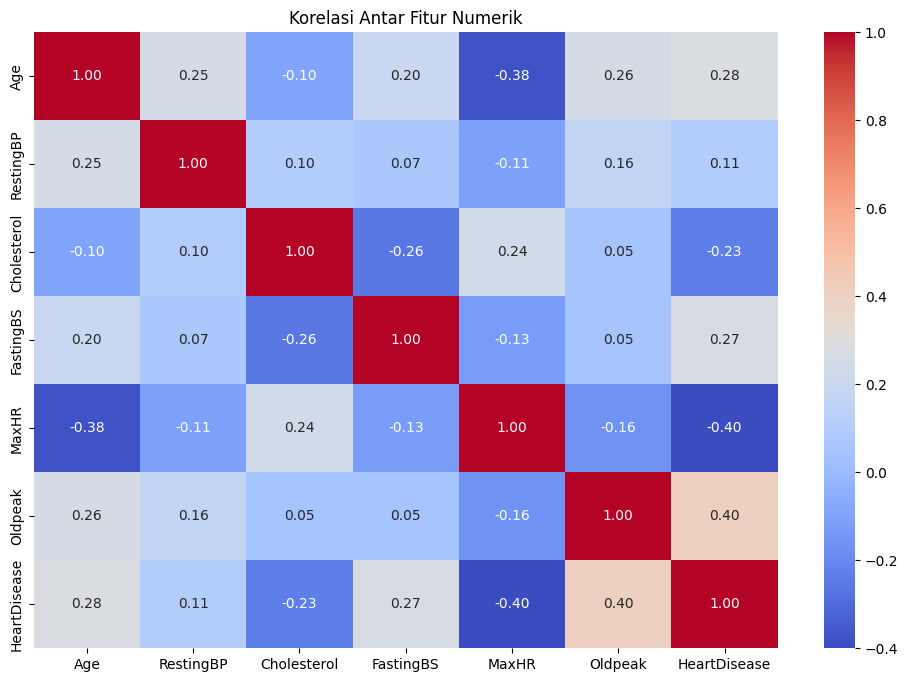

In [11]:

# 3.6. Korelasi Antar Fitur
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()




### 📌 **Insight Ringkas Dataset Kesehatan Jantung (918 data)**

1. **Usia Pasien:**
   Rata-rata usia adalah **53,5 tahun**, mayoritas antara **47–60 tahun**, menunjukkan fokus pada kelompok usia paruh baya.

2. **Tekanan Darah & Kolesterol:**

   * Rata-rata **RestingBP**: 132 mmHg → agak tinggi.
   * Rata-rata **Cholesterol**: 198 mg/dL, tapi ada nilai **0** → kemungkinan data kosong/salah.

3. **Detak Jantung Maksimum (MaxHR):**
   Rata-rata **137 bpm**, dengan minimum **60 bpm** dan maksimum **202 bpm** → variasi besar.

4. **Penderita Penyakit Jantung:**
   Kolom `HeartDisease` menunjukkan **\~55% pasien terdiagnosis** (mean = 0.55) → dataset agak seimbang untuk klasifikasi.

5. **Data Kategorikal:**
   Ada 5 kolom bertipe objek (seperti `Sex`, `ChestPainType`) → penting untuk encoding saat modeling.

6. **Outlier & Anomali:**

   * Nilai **0 pada RestingBP & Cholesterol** tidak logis → perlu dibersihkan.
   * Nilai **Oldpeak negatif (-2.6)** juga tidak wajar.




In [12]:

# ======================
# 4. DATA PREPROCESSING
# ======================
print("\n=== PREPROCESSING ===")


# 4.1. Handle Invalid Values
print("\n1. Menangani Nilai Tidak Valid:")

# Cholesterol = 0 tidak mungkin secara medis -> anggap missing value
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

# Oldpeak negatif tidak valid -> clamp ke minimum 0
df['Oldpeak'] = df['Oldpeak'].clip(lower=0)

# RestingBP = 0 tidak mungkin -> anggap missing value
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)

print("✅ Nilai tidak valid pada Cholesterol, Oldpeak, dan RestingBP sudah ditangani")



=== PREPROCESSING ===

1. Menangani Nilai Tidak Valid:
✅ Nilai tidak valid pada Cholesterol, Oldpeak, dan RestingBP sudah ditangani


In [13]:

# 4.2. Handle Missing Values
print("\n2. Imputasi Missing Values:")

# Imputasi dengan median (tanpa membuat fitur baru)
imputer = SimpleImputer(strategy='median')
df[num_features] = imputer.fit_transform(df[num_features])

print("✅ Missing values diimputasi dengan median")



2. Imputasi Missing Values:
✅ Missing values diimputasi dengan median


In [14]:

# 4.3. Handle Outliers (Disesuaikan dengan Domain Medis)
print("\n3. Penanganan Outlier yang Realistis:")

outlier_ranges = {
    'Age': (30, 100),          # Usia pasien realistis
    'RestingBP': (80, 200),    # Tekanan darah normal/tidak
    'Cholesterol': (100, 400), # Range kolesterol medis
    'MaxHR': (60, 220),        # Detak jantung manusia
    'Oldpeak': (0, 4)          # Depresi ST tidak negatif
}

for col in num_features:
    if col in outlier_ranges:
        min_val, max_val = outlier_ranges[col]
        df[col] = np.clip(df[col], min_val, max_val)
        print(f" - {col}: di-clip ke range [{min_val}, {max_val}]")



3. Penanganan Outlier yang Realistis:
 - Age: di-clip ke range [30, 100]
 - RestingBP: di-clip ke range [80, 200]
 - Cholesterol: di-clip ke range [100, 400]
 - MaxHR: di-clip ke range [60, 220]
 - Oldpeak: di-clip ke range [0, 4]


In [15]:

# 4.4. Encoding Kategorikal (Sama seperti Awal)
print("\n4. Encoding Variabel Kategorikal (Original):")


df = pd.get_dummies(df, columns=cat_features, drop_first=True)

print("✅ One-hot encoding untuk semua fitur kategorikal")



4. Encoding Variabel Kategorikal (Original):
✅ One-hot encoding untuk semua fitur kategorikal


In [16]:

# 4.4. Split Data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:

# 4.5. Scaling
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


In [18]:

# ======================
# 5. MODELING
# ======================
print("\n=== PEMBANGUNAN MODEL ===")



=== PEMBANGUNAN MODEL ===


In [19]:

# 5.1. Inisialisasi Model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')


In [20]:

# 5.2. Training
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [21]:

# 5.3. Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [22]:

# ======================
# 6. EVALUASI MODEL
# ======================
print("\n=== EVALUASI MODEL ===")



=== EVALUASI MODEL ===


In [23]:

# 6.1. Accuracy
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")



Accuracy: 0.8804


In [24]:

# 6.2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.91      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



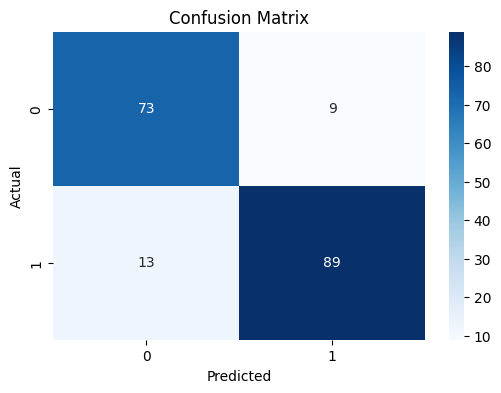

In [25]:

# 6.3. Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


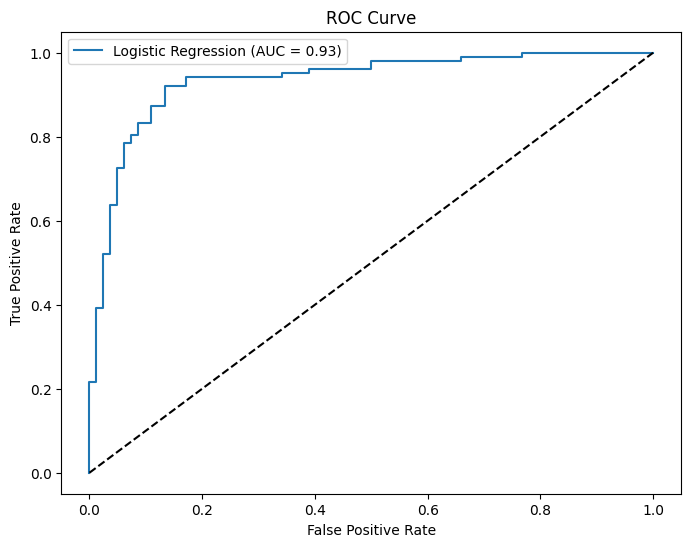

In [26]:

# 6.4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


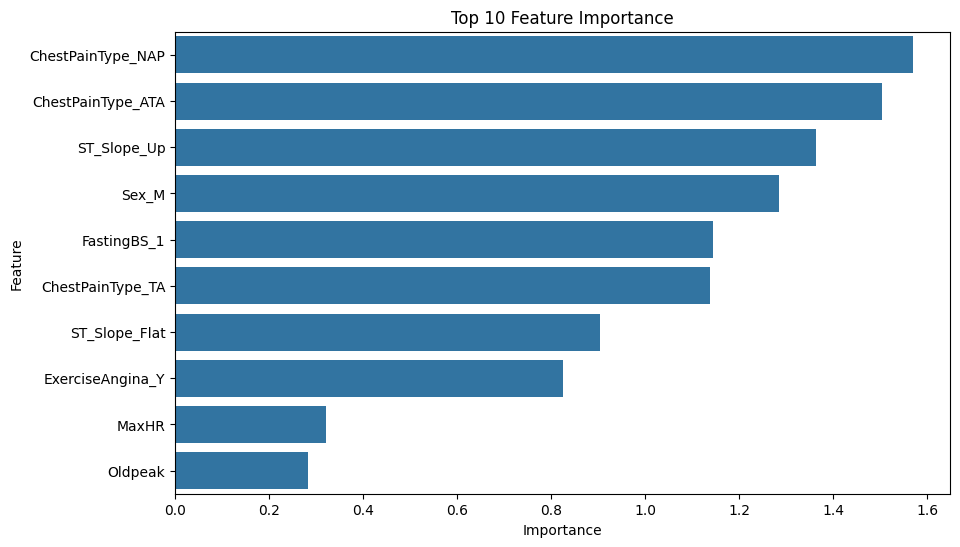

In [27]:

# 6.5. Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=coefficients.head(10))
plt.title('Top 10 Feature Importance')
plt.show()


In [28]:

# ======================
# 7. PREDIKSI DATA BARU
# ======================
print("\n=== CONTOH PREDIKSI ===")

# Fungsi untuk mempersiapkan data baru
def prepare_new_data(input_data):
    # Convert input to DataFrame
    new_df = pd.DataFrame([input_data])
    
    # Handle categorical variables
    new_df = pd.get_dummies(new_df)
    
    # Ensure all columns exist
    for col in X.columns:
        if col not in new_df.columns:
            new_df[col] = 0
    
    # Reorder columns
    new_df = new_df[X.columns]
    
    # Scale numerical features
    new_df[num_features] = scaler.transform(new_df[num_features])
    
    return new_df

# Contoh data input
sample_data = {
    'Age': 58,
    'RestingBP': 140,
    'Cholesterol': 289,
    'FastingBS': 0,
    'MaxHR': 160,
    'Oldpeak': 1.2,
    'Sex': 'M',
    'ChestPainType': 'ATA',
    'RestingECG': 'Normal',
    'ExerciseAngina': 'N',
    'ST_Slope': 'Up'
}

# Preprocess data baru
new_data = prepare_new_data(sample_data)

# Prediksi
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)[:, 1]

print("\nHasil Prediksi:")
print(f"Input Data: {sample_data}")
print(f"Prediksi: {'Penyakit Jantung' if prediction[0] == 1 else 'Tidak Ada Penyakit Jantung'}")
print(f"Probabilitas: {probability[0]*100:.2f}%")



=== CONTOH PREDIKSI ===

Hasil Prediksi:
Input Data: {'Age': 58, 'RestingBP': 140, 'Cholesterol': 289, 'FastingBS': 0, 'MaxHR': 160, 'Oldpeak': 1.2, 'Sex': 'M', 'ChestPainType': 'ATA', 'RestingECG': 'Normal', 'ExerciseAngina': 'N', 'ST_Slope': 'Up'}
Prediksi: Tidak Ada Penyakit Jantung
Probabilitas: 7.85%


In [29]:

# ======================
# 8. SIMPAN MODEL
# ======================
import joblib
import datetime

# Simpan model dan preprocessing objects
model_data = {
    'model': model,
    'scaler': scaler,
    'imputer': imputer,
    'features': X.columns.tolist(),
    'num_features': num_features,
    'date': datetime.datetime.now().strftime("%Y-%m-%d")
}

# Simpan model ke folder models buat jika belum ada
if not os.path.exists('../models'):
    os.makedirs('../models')
joblib.dump(model_data, '../models/heart_disease_model.pkl')
print("\nModel berhasil disimpan!")



Model berhasil disimpan!
